<a href="https://colab.research.google.com/github/Tejws/Advance-Machine-Learning-Models-from-Scratch/blob/main/Bone_fracture_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
pip install tensorflow keras opencv-python matplotlib numpy                        # Tejas Ingle 06


In [3]:
import zipfile
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_zip_path = '/content/fract.zip'
extract_to = '/content/r'

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

dataset_dir = os.path.join(extract_to, 'archive (6)')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')                                        # Tejas Ingle 06


img_height, img_width = 224, 224
batch_size = 16


image_paths = []
labels = []


for class_name in ['fractured', 'not fractured']:
    class_dir = os.path.join(train_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)

        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(img_path)
            labels.append(1 if class_name == 'fractured' else 0)


train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, labels, test_size=0.15, random_state=42)


train_df = pd.DataFrame({'filename': train_paths, 'class': train_labels})
val_df = pd.DataFrame({'filename': val_paths, 'class': val_labels})


train_df['class'] = train_df['class'].astype(str)
val_df['class'] = val_df['class'].astype(str)


from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

print("Number of images in train_generator:", len(train_generator.filenames))
print("Number of images in val_generator:", len(val_generator.filenames))



Found 7510 validated image filenames belonging to 2 classes.
Found 1326 validated image filenames belonging to 2 classes.
Number of images in train_generator: 7510
Number of images in val_generator: 1326


In [4]:
import os


val_dir = '/content/r/archive (6)/train'
print("Validation directory contents:")
for class_name in ['fractured', 'not fractured']:
    class_dir = os.path.join(val_dir, class_name)
    print(f"Class '{class_name}' has {len(os.listdir(class_dir))} images")


Validation directory contents:
Class 'fractured' has 4453 images
Class 'not fractured' has 4383 images


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])



model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,                                                                  # Tejas Ingle 06
    restore_best_weights=True
)


history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


470/470 ━━━━━━━━━━━━━━━━━━━━ 117s 226ms/step - accuracy: 0.5322 - loss: 1.0575 - val_accuracy: 0.5754 - val_loss: 0.7143
Epoch 2/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 129s 216ms/step - accuracy: 0.5607 - loss: 0.7143 - val_accuracy: 0.6131 - val_loss: 0.6771
Epoch 3/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 140s 211ms/step - accuracy: 0.5870 - loss: 0.6949 - val_accuracy: 0.5897 - val_loss: 0.6780
Epoch 4/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 142s 210ms/step - accuracy: 0.5754 - loss: 0.6876 - val_accuracy: 0.6146 - val_loss: 0.6575
Epoch 5/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 102s 215ms/step - accuracy: 0.5920 - loss: 0.6853 - val_accuracy: 0.6425 - val_loss: 0.6342
Epoch 6/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 141s 214ms/step - accuracy: 0.6238 - loss: 0.6650 - val_accuracy: 0.6576 - val_loss: 0.6447
Epoch 7/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 142s 215ms/step - accuracy: 0.6257 - loss: 0.6635 - val_accuracy: 0.6531 - val_loss: 0.6257
Epoch 8/50
470/470 ━━━━━━━━━━━━━━━━━━━━ 140s 211ms/step - accuracy: 0.6587 - loss: 0.64

In [7]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9382 - loss: 0.3319
Validation Loss: 0.3377056419849396
Validation Accuracy: 0.9343891143798828


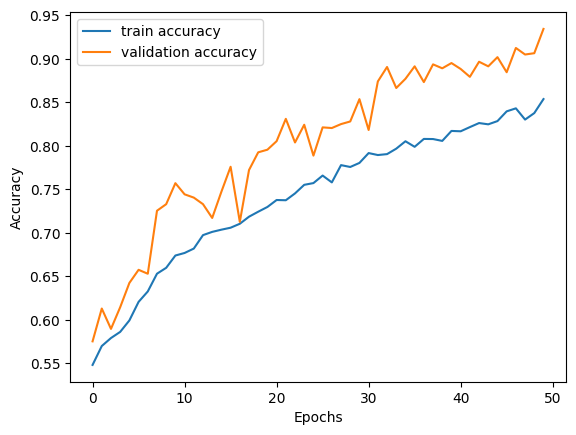

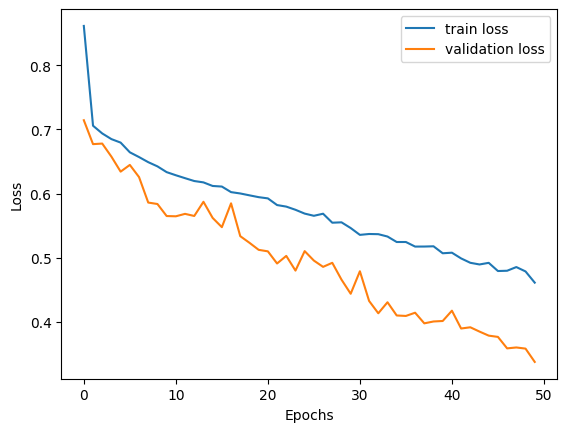

In [8]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
                                                                                  # Tejas Ingle 06

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: Not Fractured


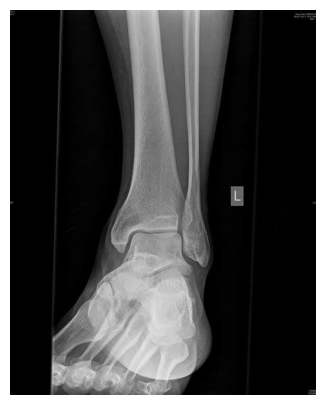

In [46]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = '/content/normal left foot x-rays.jpeg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
                                                                                                  # Tejas Ingle 06
prediction = model.predict(img_array)
print(f'Prediction: {"Fractured" if prediction[0] > 0.5 else "Not Fractured"}')
# Display the image and prediction
plt.figure(figsize=(5, 5))
plt.imshow(image.load_img(img_path))

plt.axis('off')  # Hide axes
plt.show()

In [32]:

model.save('bone_fracture_detection_model.h5')


from tensorflow.keras.models import load_model
loaded_model = load_model('bone_fracture_detection_model.h5')
